In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nst-trial/Starry Night.jpg
/kaggle/input/nst-trial/Emma Watson.jpg


In [2]:
import torch
from torch import nn
from PIL import Image
from torchvision.utils import save_image
import torchvision.transforms as transforms
import torchvision.models as models

In [3]:
model=models.vgg19(pretrained=True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 164MB/s]  


In [4]:
!pip install torchview

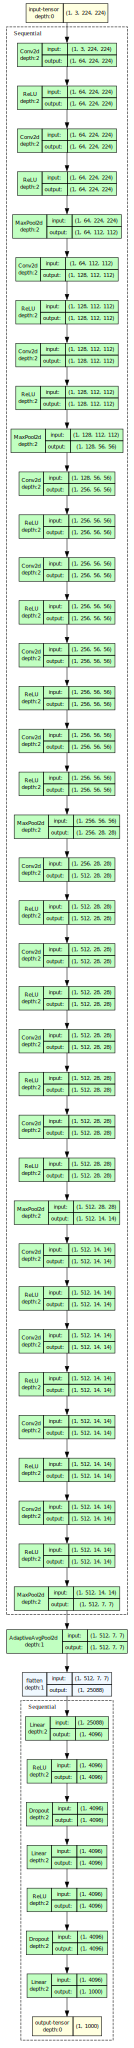

In [5]:
from torchview import draw_graph
model_graph=draw_graph(model,input_size=(1,3,224,224),expand_nested=True)
model_graph.visual_graph

In [6]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [7]:
model=model.features[:29]
model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [8]:
model[10]

Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [9]:
wanted=[0,5,10,19,28]

In [10]:
class VGG(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.chosen_features=[0,5,10,19,28]
        self.model=models.vgg19(pretrained=True).features[:29]
        
    def forward(self,x):
        features=[]
        for layer_num,layer in enumerate(self.model):
            x=layer(x)
            
            if layer_num in self.chosen_features:
                features.append(x)
                
        return features

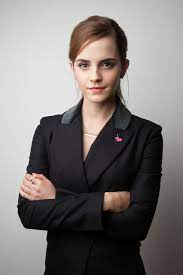

In [11]:
im=Image.open("/kaggle/input/nst-trial/Emma Watson.jpg")
im

In [12]:
im.size

(183, 275)

In [13]:
device="cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [14]:
image_size=224

In [15]:
loader=transforms.Compose([
    transforms.Resize((im.size[1],im.size[0])),
    transforms.ToTensor()
])

In [16]:
def load_image(image_name):
    image=Image.open(image_name)
    image=loader(image).unsqueeze(0)
    return image.to(device)

In [17]:
original_image=load_image("/kaggle/input/nst-trial/Emma Watson.jpg")
style_image=load_image("/kaggle/input/nst-trial/Starry Night.jpg")

In [18]:
original_image.shape

torch.Size([1, 3, 275, 183])

In [19]:
import matplotlib.pyplot as plt

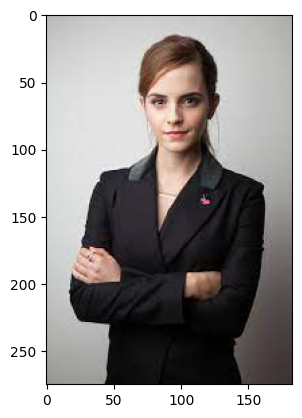

In [20]:
plt.imshow(original_image.cpu().squeeze().permute(1,2,0))

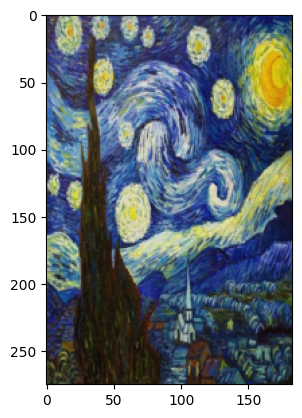

In [21]:
plt.imshow(style_image.cpu().squeeze().permute(1,2,0))

In [22]:
generated=original_image.clone().requires_grad_(True)

In [23]:
total_steps=4000
learning_rate=0.01
alpha=0.01
beta=1
optimizer=torch.optim.Adam([generated],lr=learning_rate)

In [24]:
model=VGG().to(device)
model.eval()
y=model(generated)
len(y)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


5

In [25]:
x=1*torch.tensor([1.],requires_grad=True)
x.backward()

In [26]:
model=VGG().to(device)
model.eval()
for step in range(total_steps):
    generated_features=model(generated)
    original_img_features=model(original_image)
    style_features=model(style_image)
    
    style_loss=original_loss=0
    
    for gen_feature,orig_feature,style_feature in zip(generated_features,original_img_features,style_features):
        batch_size,channel,height,width=gen_feature.shape
        original_loss+=torch.mean((gen_feature-orig_feature)**2)
        
        G=gen_feature.view(channel,height*width).mm(gen_feature.view(channel,height*width).t())
        
        A=style_feature.view(channel,height*width).mm(style_feature.view(channel,height*width).t())
        
        style_loss+=torch.mean((G-A)**2)
        
    total_loss=alpha*original_loss+beta*style_loss
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    if step%500==0:
        print(total_loss)
        save_image(generated,str(step)+".jpg")
        

tensor(12689530., device='cuda:0', grad_fn=<AddBackward0>)
tensor(62496.1250, device='cuda:0', grad_fn=<AddBackward0>)
tensor(42972.7539, device='cuda:0', grad_fn=<AddBackward0>)
tensor(36789.8320, device='cuda:0', grad_fn=<AddBackward0>)
tensor(32909.6719, device='cuda:0', grad_fn=<AddBackward0>)
tensor(31252.0312, device='cuda:0', grad_fn=<AddBackward0>)
tensor(202677.7500, device='cuda:0', grad_fn=<AddBackward0>)
tensor(36246.1992, device='cuda:0', grad_fn=<AddBackward0>)


/kaggle/working/2000.jpg


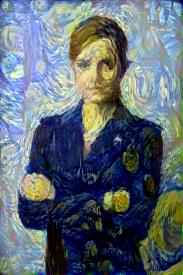


/kaggle/working/2500.jpg


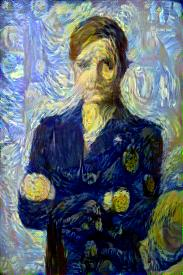


/kaggle/working/1500.jpg


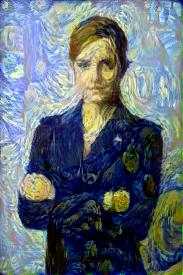


/kaggle/working/1000.jpg


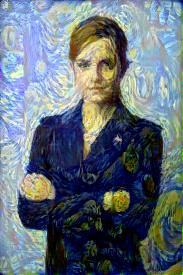


/kaggle/working/3000.jpg


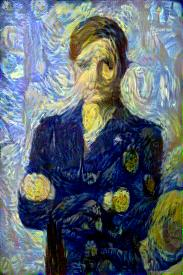


/kaggle/working/3500.jpg


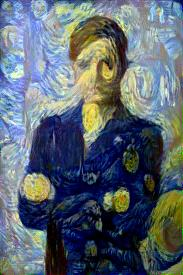


/kaggle/working/0.jpg


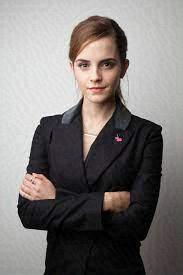


/kaggle/working/500.jpg


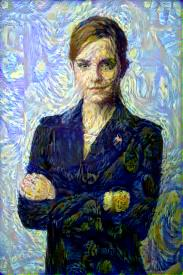

In [27]:
from pathlib import Path
out_dir=Path("/kaggle/working/")
out_img=list(out_dir.glob("*.jpg"))
for i in out_img:
    print(i)
    im=Image.open(i)
    display(im)
    print()

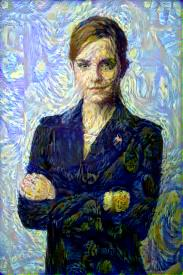

In [28]:
im=Image.open("/kaggle/working/500.jpg")
im